# Lab: Build Neural Networks via Pytorch

The purpose of this assignment is to learn how to build neural networks using PyTorch, focusing on both the theoretical and practical aspects of the process.

One key step involves passing the output of a regression model through the Sigmoid function. This operation transforms the raw output (often called the logit) into a probability value between 0 and 1, which represents the likelihood of an observation belonging to the positive class. 

This step is particularly important in binary classification tasks, as it allows us to interpret the model's predictions in probabilistic terms and enables subsequent evaluation using metrics such as accuracy or binary cross-entropy loss.

## Imports
<hr>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torchsummary import summary
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_regression, make_circles, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


## Neural Network Classification
<hr>

### 1. Binary Classification

We will build a binary classification model using PyTorch. The output of the regression model will be passed through the Sigmoid function to convert it into a value between 0 and 1, representing the probability that an observation belongs to the positive class.

#### PyTorch Tensor

Please convert your input data, X (features) and y (labels), into PyTorch tensors so they can be used with PyTorch models.

X_t and y_t are created as tensors with the data type torch.float32, which is required for most machine learning tasks in PyTorch.

In [6]:
X, y = make_circles(n_samples=300, factor=0.5, noise=0.1, random_state=2020)


#Have X_t and y_t are created as tensors with the data type torch.float32
X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.float32).reshape(-1,1)


#### TensorDataset
Use PyTorch's TensorDataset and DataLoader to prepare the dataset for training, including batching and shuffling.

Requirements:

Combine X_t and y_t into a dataset using TensorDataset.

Use DataLoader to create batches of data for training. The batch size should be specified by the variable 45.
Enable shuffle=True in the DataLoader to randomize the order of data for each epoch.

In [21]:
batchSize = 45 #Have the batchSize

dataset = TensorDataset(X_t, y_t)
#Create dataloader
dataloader = DataLoader(dataset, batch_size= batchSize, shuffle= True)
dataloader

#### Visualize your circular dataset

Visualize your circular dataset with the following requirements:

- The figure size should be set to 5×5.
- Data points with y = 0 should be marked in blue, and those with y = 1 should be marked in red.
- Both the x-axis and y-axis labels should have a font size of 14.

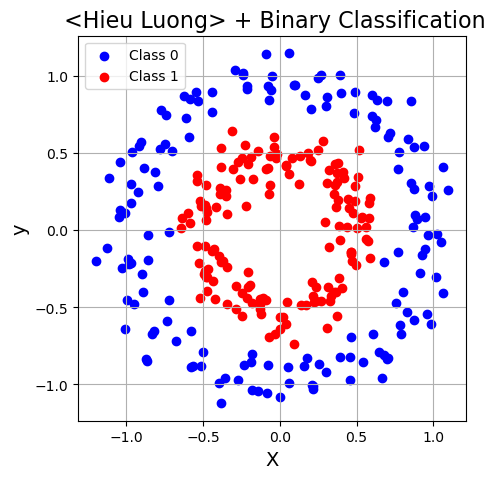

In [22]:
# Your code set graph axises
plt.figure(figsize=(5,5))
#plot with scatter
plt.scatter(X[y== 0,0],X[y == 0,1], color = "blue", label = "Class 0")
plt.scatter(X[y==1,0], X[y ==1,1], color = "red", label = "Class 1")

#Add the x, y label and also the tittle of the graph
plt.xlabel("X", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title(" <Hieu Luong> + Binary Classification", fontsize=16)
plt.legend(loc = "upper left")
plt.grid()
plt.show()


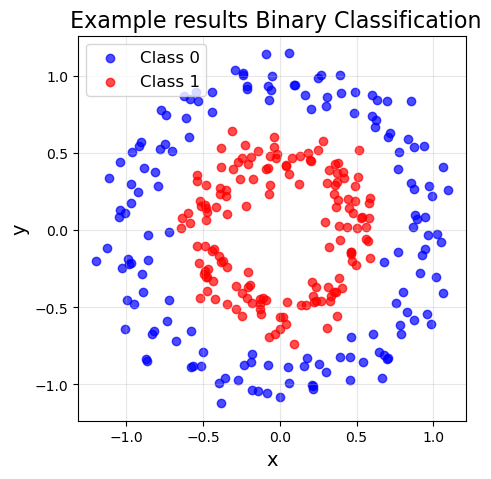

In [4]:
# Plot each class
# Example results

We're going to start using `ReLU` as our activation function(s) and `Adam` as our optimizer because these are what are currently, commonly used in practice. We are doing classification now so we'll need to use log loss (binary cross entropy) as our loss function:

$$f(w) = \sum_{x,y \in D} -y log(\hat{y}) - (1-y)log(1-\hat{y})$$

#### Create Neural Network 

Implement a neural network class for binary classification using PyTorch's nn.Module.

- Create a fully connected layer that maps the input features to the hidden layer.
- Use Relu as activation
- Create another fully connected layer
- Use Sigmoid


In [8]:

class binaryClassifier(nn.Module):
    """
    Attributes :
    main: A sequential container of layers consisting of:
    Linear transformation from input_size to hidden_size
    ReLU activation function
    Linear transformation from hidden_size to output_size
    Sigmoid activation function for binary classification
    Args:
    input_size(int): The number of input features
    hidden_size(int): The number of neurons in the hidden layers
    output_size(int, optional): The number of output neurons

    """
    def __init__(self, input_size, hidden_size, output_size=1):
        super().__init__()
        self.main = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size),
            nn.Sigmoid() #sigmoid activation for binary classification
            
        
        )

    def forward(self, x):
        out = self.main(x)
        return out

#### Build trainer

Implement a simple training wrapper for a PyTorch network that handles the forward pass, backpropagation, and parameter updates for multiple epochs.

Training Process:

Epoch Loop: 
- Iterate over the specified number of epochs.

Batch Loop:
- Iterate over batches of X and y from the dataloader.
- Clear the gradients using optimizer.zero_grad().
- Perform a forward pass:
- Use the model to compute predictions (y_hat).
- Flatten the output to match the expected shape if necessary.
- Calculate the loss using criterion(y_hat, y).
- Perform backpropagation with loss to compute gradients.
- Update model parameters using optimizer.step().
- Accumulate the loss for the batch into a running total.

Logging:
- At the end of each epoch, compute and print the average loss over all batches if verbose is True.

In [23]:
def trainer(model, criterion, optimizer, dataloader, epochs=5, verbose=True):
    """
    Trains a binary classfication model using the given dataset
    Args:
    model: The neural network model to be trainer
    criterion: The loss function used for training
    optimizer: the optimization algorithm
    dataloader: the data loader containing traning data
    epochs: Number of training epochs
    verbose
    """
    for epoch in range(epochs):
        losses = 0
        for X, y in dataloader:
            optimizer.zero_grad()  # Clear gradients w.r.t. parameters
            y_hat= model(X)        # Forward pass to get output
            loss = criterion(y_hat,y.float()) # Calculate loss 
            loss.backward()          # Getting gradients w.r.t. parameters
            optimizer.step()       # Update parameters
            losses += loss.item()   # Add loss for this batch to running total
        if verbose: print(f"epoch: {epoch + 1}, loss: {losses / len(dataloader):.4f}")

In [24]:

# set your mode with 2 input layers, 6 hidden layers, and 1 output layers via binaryClassifier class
model = binaryClassifier(input_size=2, hidden_size=6, output_size=1)

In PyTorch, the binary cross entropy loss criterion is `torch.nn.BCELoss`. The formula expects a "probability" which is why we add a Sigmoid function to the end of out network.

In [11]:
LEARNING_RATE = 0.1
criterion = nn.BCELoss() # loss function - binary cross entropy loss
optimizer = optim.Adam(model.parameters(), lr= LEARNING_RATE) # optimization algorithm - Adam

Let's train the model:

#### Activation functions

We're going to using `ReLU` as our activation function(s) and `Adam` as our optimizer because these are what are currently, commonly used in practice. We are doing classification now so we'll need to use log loss (binary cross entropy) as our loss function:

$$f(w) = \sum_{x,y \in D} -y log(\hat{y}) - (1-y)log(1-\hat{y})$$

In PyTorch, the binary cross entropy loss criterion is `torch.nn.BCELoss`. The formula expects a "probability" which is why we add a Sigmoid function to the end of out network.

In [25]:
LEARNING_RATE = 0.1
criterion = torch.nn.BCELoss() # loss function
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)  # optimization algorithm

In [26]:

def trainer(model, criterion, optimizer, dataloader, epochs=30, verbose=True):
    """
    Trains a binary classfication model using the given dataset
    Args:
    model: The neural network model to be trainer
    criterion: The loss function used for training
    optimizer: the optimization algorithm
    dataloader: the data loader containing traning data
    epochs: Number of training epochs
    verbose
    """
    loss_history =[] #set the loss_history
    for epoch in range(epochs):
        losses=0
        for X,y in dataloader:
            optimizer.zero_grad()                 # Clear gradients w.r.t. parameters
            y_hat= model(X)                       # Forward pass to get output
            loss= criterion(y_hat, y.float())      # Calculate loss
            loss.backward()                      # Getting gradients w.r.t. parameters 
            optimizer.step()                       # Update parameters
            losses += loss.item()                 # Add loss for this batch to running total

        avg_loss = losses/ len(dataloader)
        loss_history.append(avg_loss)             #append the loss_history
        if verbose:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {losses / len(dataloader):.4f}")
    return loss_history
  
loss_history= trainer(model, criterion, optimizer, dataloader, epochs=30, verbose=True)


Epoch 1/30, Loss: 0.6907
Epoch 2/30, Loss: 0.6385
Epoch 3/30, Loss: 0.5731
Epoch 4/30, Loss: 0.4763
Epoch 5/30, Loss: 0.3757
Epoch 6/30, Loss: 0.2932
Epoch 7/30, Loss: 0.2268
Epoch 8/30, Loss: 0.1763
Epoch 9/30, Loss: 0.1358
Epoch 10/30, Loss: 0.1185
Epoch 11/30, Loss: 0.0960
Epoch 12/30, Loss: 0.0868
Epoch 13/30, Loss: 0.0739
Epoch 14/30, Loss: 0.0636
Epoch 15/30, Loss: 0.0627
Epoch 16/30, Loss: 0.0516
Epoch 17/30, Loss: 0.0512
Epoch 18/30, Loss: 0.0466
Epoch 19/30, Loss: 0.0552
Epoch 20/30, Loss: 0.0456
Epoch 21/30, Loss: 0.0539
Epoch 22/30, Loss: 0.0383
Epoch 23/30, Loss: 0.0369
Epoch 24/30, Loss: 0.0359
Epoch 25/30, Loss: 0.0328
Epoch 26/30, Loss: 0.0328
Epoch 27/30, Loss: 0.0328
Epoch 28/30, Loss: 0.0308
Epoch 29/30, Loss: 0.0293
Epoch 30/30, Loss: 0.0364


#### Visualize your results 

#### Part 1: Loss Curve

- Please plot the loss curve during training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

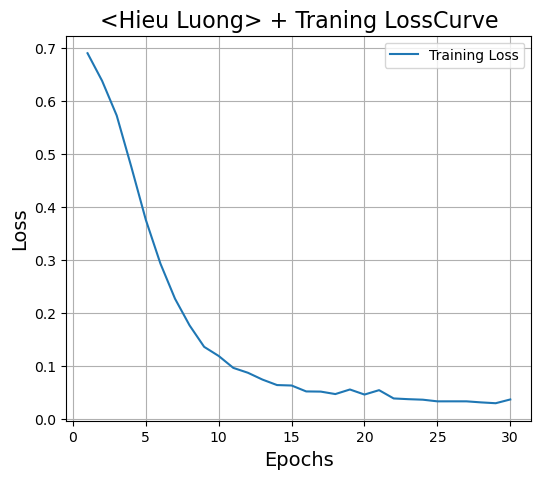

In [27]:
#Plt the figure, with the x, y and the tittle
plt.figure(figsize=(6,5))
plt.plot(range(1, len(loss_history) +1),loss_history, label="Training Loss", linestyle="-")
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.title("<Hieu Luong> + Traning LossCurve", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


### Part 2: Actual and predicted data 

- Please plot the Actual and predicted data after training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

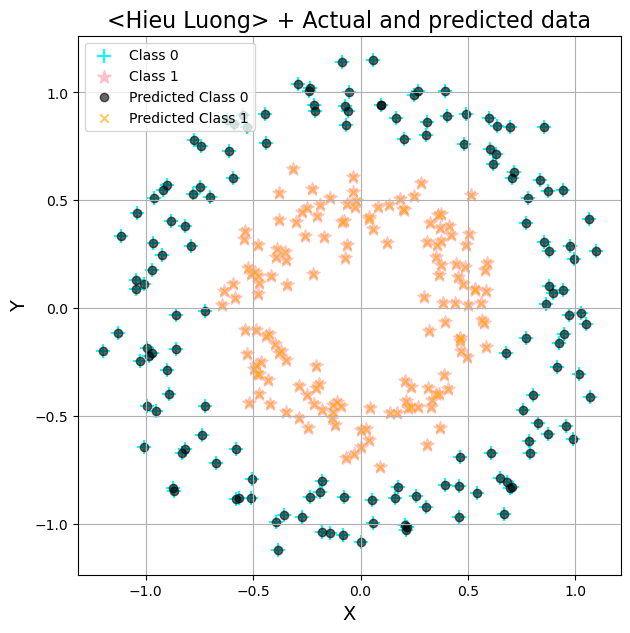

In [28]:
#Convert the tensor to numpy array
X_numpy = X_t.numpy()
y_numpy = y_t.numpy().ravel()  
#get the model prediction
y_pred = model(X_t).detach().numpy()
y_pred = (y_pred > 0.5).astype(int).ravel()  

plt.figure(figsize=(7, 7))

#Have the data at first
plt.scatter(X_numpy[y_numpy == 0, 0], X_numpy[y_numpy == 0, 1], color="cyan",marker = '+',s=100, label="Class 0")
plt.scatter(X_numpy[y_numpy == 1, 0], X_numpy[y_numpy == 1, 1], color="pink",marker='*', s=100, label="Class 1")

# Have the predict data
plt.scatter(X_numpy[y_pred == 0, 0], X_numpy[y_pred == 0, 1], color="black", label="Predicted Class 0", marker="o", alpha=0.6)
plt.scatter(X_numpy[y_pred == 1, 0], X_numpy[y_pred == 1, 1], color="orange", label="Predicted Class 1", marker="x", alpha=0.6)
#plt the title with x and y
plt.title("<Hieu Luong> + Actual and predicted data", fontsize =16)
plt.xlabel("X", fontsize= 14)
plt.ylabel("Y", fontsize= 14)
plt.grid(True)
plt.legend()
plt.show()


To be clear, our model is just outputting some number between -1 and +1 (we are applying Sigmoid in the model), so:
- To get the probabilities we would need to pass them through a Sigmoid;
- To get classes, we can apply some threshold (usually 0.5) to this probability.

For example, we would expect the point (0,0) to have a high probability and the point (-1,-1) to have a low probability:

In [29]:

prediction = model(X_t).detach().numpy()
print(prediction)

[[9.9388498e-01]
 [9.9999464e-01]
 [9.9985528e-01]
 [9.9998367e-01]
 [6.6114649e-06]
 [9.9666303e-01]
 [4.9449805e-02]
 [9.9785370e-01]
 [9.9960536e-01]
 [9.9973470e-01]
 [2.5194304e-04]
 [9.9915171e-01]
 [9.9996412e-01]
 [1.1275782e-02]
 [4.9449805e-02]
 [6.8831318e-03]
 [3.4992930e-02]
 [9.9914396e-01]
 [5.4193765e-02]
 [3.3402215e-03]
 [8.9433002e-01]
 [9.7362703e-01]
 [2.4821038e-05]
 [9.9922347e-01]
 [9.6004719e-01]
 [9.9467862e-01]
 [9.9941754e-01]
 [9.9952209e-01]
 [9.9996686e-01]
 [1.1065759e-04]
 [9.9916506e-01]
 [1.7521431e-01]
 [9.9913919e-01]
 [4.3003922e-04]
 [9.5031852e-01]
 [9.9801636e-01]
 [1.2201837e-03]
 [5.9494876e-05]
 [1.5588637e-01]
 [9.9994147e-01]
 [9.9979514e-01]
 [9.9996114e-01]
 [3.9441373e-02]
 [9.9570662e-01]
 [1.0031278e-04]
 [1.6248294e-03]
 [2.2612001e-04]
 [9.9973553e-01]
 [1.6711440e-04]
 [1.2204308e-03]
 [1.1737489e-04]
 [1.6989378e-02]
 [3.8351822e-03]
 [9.9991345e-01]
 [1.0831572e-01]
 [9.9978715e-01]
 [3.4199402e-02]
 [9.9937433e-01]
 [9.9999499e-0

In [30]:
probability = prediction
print(probability)

[[9.9388498e-01]
 [9.9999464e-01]
 [9.9985528e-01]
 [9.9998367e-01]
 [6.6114649e-06]
 [9.9666303e-01]
 [4.9449805e-02]
 [9.9785370e-01]
 [9.9960536e-01]
 [9.9973470e-01]
 [2.5194304e-04]
 [9.9915171e-01]
 [9.9996412e-01]
 [1.1275782e-02]
 [4.9449805e-02]
 [6.8831318e-03]
 [3.4992930e-02]
 [9.9914396e-01]
 [5.4193765e-02]
 [3.3402215e-03]
 [8.9433002e-01]
 [9.7362703e-01]
 [2.4821038e-05]
 [9.9922347e-01]
 [9.6004719e-01]
 [9.9467862e-01]
 [9.9941754e-01]
 [9.9952209e-01]
 [9.9996686e-01]
 [1.1065759e-04]
 [9.9916506e-01]
 [1.7521431e-01]
 [9.9913919e-01]
 [4.3003922e-04]
 [9.5031852e-01]
 [9.9801636e-01]
 [1.2201837e-03]
 [5.9494876e-05]
 [1.5588637e-01]
 [9.9994147e-01]
 [9.9979514e-01]
 [9.9996114e-01]
 [3.9441373e-02]
 [9.9570662e-01]
 [1.0031278e-04]
 [1.6248294e-03]
 [2.2612001e-04]
 [9.9973553e-01]
 [1.6711440e-04]
 [1.2204308e-03]
 [1.1737489e-04]
 [1.6989378e-02]
 [3.8351822e-03]
 [9.9991345e-01]
 [1.0831572e-01]
 [9.9978715e-01]
 [3.4199402e-02]
 [9.9937433e-01]
 [9.9999499e-0

In [31]:
classes = np.where(probability > 0.5, 1, 0)
print(classes)

[[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]


### 2. Multiclass Classification

For multiclass classification, we'll need the softmax function:

$$\sigma(\vec{z})_i=\frac{e^{z_i}}{\sum_{j=1}^{K}e^{z_j}}$$

It basically outputs probabilities for each class we wish to predict, and they all sum to 1. 

`torch.nn.CrossEntropyLoss` is a loss that combines a softmax with cross entropy loss. 

Let's try a 4-class classification problem using the following network:


In [101]:
X, y = make_blobs(n_samples=200, centers=4, center_box=(-1.2, 1.2), cluster_std=[0.15, 0.15, 0.15, 0.15], random_state=12345)
X_t = torch.tensor(X,dtype=torch.float32)
y_t = torch.tensor(y,dtype=torch.long)

# have dataset
dataset = TensorDataset(X_t,y_t)
#Create dataloader
dataloader = DataLoader(dataset, batch_size= 45,shuffle = True)

In [102]:
class multiClassifier(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = torch.nn.Sequential(
            torch.nn.Linear(input_size, hidden_size),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        out = self.main(x)
        return out

#### Visualize your circular dataset

Visualize your circular dataset with the following requirements:

- The figure size should be set to 5×5.
- Both the x-axis and y-axis labels should have a font size of 14.

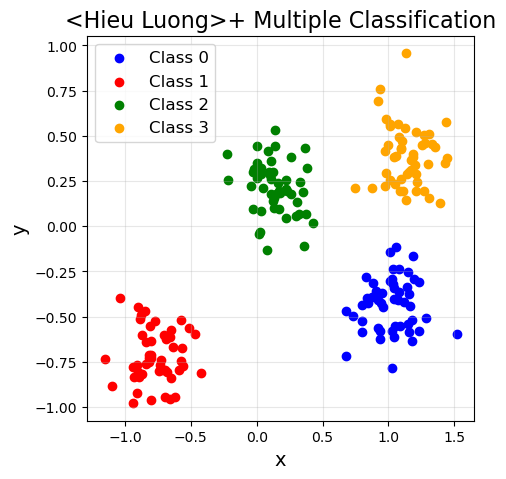

In [67]:
# Plot each class
# Your code plot with scatter

# Add Label and title
plt.figure(figsize=(5,5))
plt.scatter(X[y == 0,0], X[y == 0,1], color = "blue", label="Class 0")
plt.scatter(X[y == 1,0], X[y == 1,1], color = "red", label="Class 1")
plt.scatter(X[y == 2,0], X[y == 2,1], color = "green", label="Class 2")
plt.scatter(X[y == 3,0], X[y == 3,1], color = "orange", label="Class 3")

plt.title("<Hieu Luong>+ Multiple Classification", fontsize=16)
# Your code 

plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Let's train this model:

In [71]:
# model with 2 input layers, 6 hidden layers, and 4 output layers via multiClassifier class
# Your code 
model_2 = multiClassifier(input_size=2, hidden_size=6, output_size=4)

# Your code 
criterion = torch.nn.CrossEntropyLoss()# loss function with CrossEntropyLoss
optimizer =torch.optim.Adam(model_2.parameters(), lr =0.2) # optimization algorithm - Adam lr=0.2

accuracy_list= []
for epoch in range(10):
    correct =0
    losses = 0
    total = 0
    for X_batch, y_batch in dataloader:
        optimizer.zero_grad()
        y_pred= model_2(X_batch)
        loss= criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        losses += loss.item()

        _, predicted = torch.max(y_pred,1)
        correct += (predicted == y_batch).sum().item()
        total+= y_batch.size(0)
    accuracy = correct /total
    accuracy_list.append(accuracy)
    print(f"epoch: {epoch + 1}, loss: {losses / len(dataloader):.4f}")

epoch: 1, loss: 0.8114
epoch: 2, loss: 0.1361
epoch: 3, loss: 0.0174
epoch: 4, loss: 0.0053
epoch: 5, loss: 0.0018
epoch: 6, loss: 0.0011
epoch: 7, loss: 0.0007
epoch: 8, loss: 0.0005
epoch: 9, loss: 0.0004
epoch: 10, loss: 0.0003


#### Visualize your results 

### Part 3: Accuracy Curve for 4 classes

- Please plot the Accuracy Curve during training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

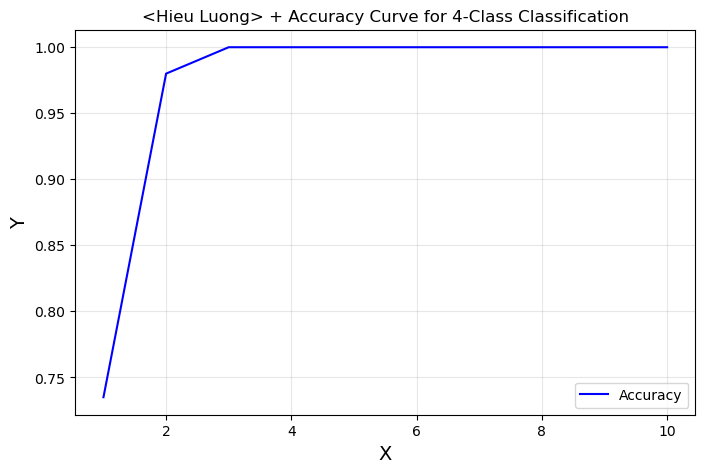

In [77]:
# Your code
plt.figure(figsize=(8,5))
plt.plot(range(1,len(accuracy_list) +1), accuracy_list,linestyle='-', color= 'blue', label ='Accuracy')
plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.title("<Hieu Luong> + Accuracy Curve for 4-Class Classification")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Part 4: Actual and predicted data for classes

- Please plot the Actual and predicted data after training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

In [ ]:
# Your code

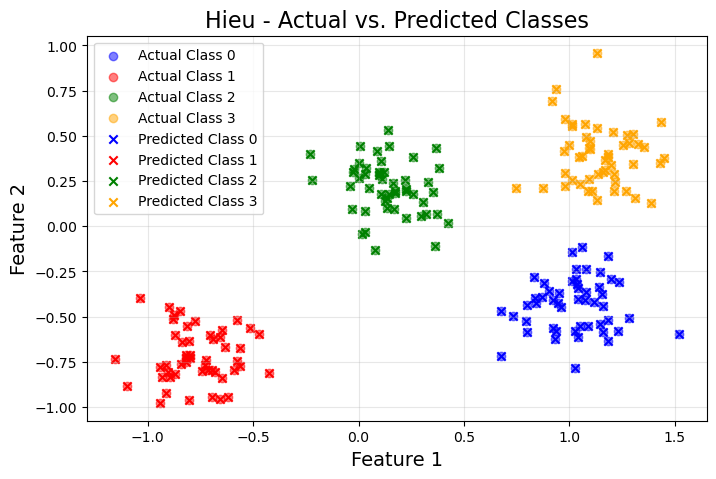

In [78]:
# Get predictions from the trained model
with torch.no_grad():  # Disable gradient computation for efficiency
    y_pred = model_2(X_t)
    _, predicted_labels = torch.max(y_pred, 1)  # Get the class predictions

# Plot Actual vs. Predicted Classes
plt.figure(figsize=(8, 5))

# Actual data (Ground Truth)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="blue", label="Actual Class 0", alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="red", label="Actual Class 1", alpha=0.5)
plt.scatter(X[y == 2, 0], X[y == 2, 1], color="green", label="Actual Class 2", alpha=0.5)
plt.scatter(X[y == 3, 0], X[y == 3, 1], color="orange", label="Actual Class 3", alpha=0.5)

# Predicted data (Overlay predictions with different markers)
plt.scatter(X[predicted_labels == 0, 0], X[predicted_labels == 0, 1], marker="x", color="blue", label="Predicted Class 0")
plt.scatter(X[predicted_labels == 1, 0], X[predicted_labels == 1, 1], marker="x", color="red", label="Predicted Class 1")
plt.scatter(X[predicted_labels == 2, 0], X[predicted_labels == 2, 1], marker="x", color="green", label="Predicted Class 2")
plt.scatter(X[predicted_labels == 3, 0], X[predicted_labels == 3, 1], marker="x", color="orange", label="Predicted Class 3")

# Labels, title, and legend
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.title("Hieu - Actual vs. Predicted Classes", fontsize=16)
plt.legend()
plt.grid(alpha=0.3)
plt.show()
